In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json

# LU Timings Analysis

## 1. Get the data from previous runs

In [3]:
results = json.load(open("./Results/Linear Systems/LU_Timings.json", "r"))

## 2. Transform the data
We have per method performed, n different sizes, and each size has an array of timings. We want to see the average time per size, and plot them in a graph.

In [4]:
df = pd.DataFrame(results)
# map the values to np.mean
df = df.applymap(lambda x: np.mean(x))
df

,Submatrices,New Axis,Outer Product,Loop,scipy
500,0.413350,0.169461,0.117083,0.465405,0.018257
1000,2.563606,1.522018,1.110119,2.176568,0.030570
1500,8.535015,5.212411,3.808700,5.579113,0.069611
2000,20.305880,12.333257,9.134406,10.942175,0.132066
2500,39.145535,23.998247,17.653031,19.098659,0.216267
3000,68.789119,41.919219,31.590708,29.468995,0.424020
3500,106.423081,64.700578,47.661064,42.445734,0.447992
4000,157.028937,96.519873,70.584879,58.448117,0.603978


# 3. Plot the data


## 3.1 Normal plot

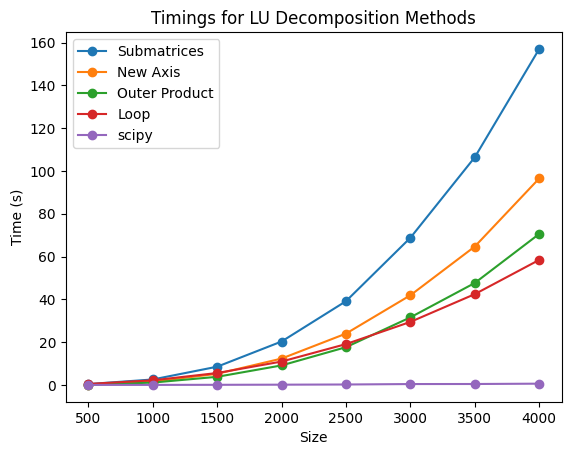

In [5]:
# Plot the results using matplotlib
plt.figure()
for mode in results.keys():
    plt.plot(df.index, df[mode], "o-", label=mode)
plt.title("Timings for LU Decomposition Methods")
plt.xlabel("Size")
plt.ylabel("Time (s)")
plt.legend()

# Save the plot to a file with high resolution
plt.savefig("./Results/Linear Systems/LU_Timings.png", dpi=1000)

## 3.2 Log plot
With a log plot, we can see the trend better. We can see that the LU method is O(n^3) 

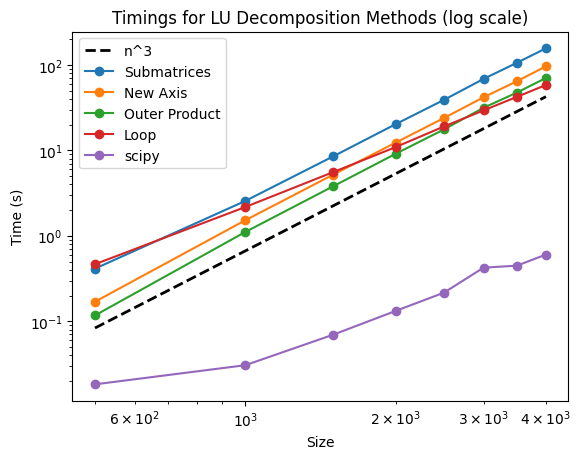

In [25]:
x = np.array(list(map(lambda y: float(y), df.index)))
# Plot the results using matplotlib with log scale
plt.figure()
# plot n^3
plt.loglog(x, 2 / 3 * 1e-9 * x**3, "k--", label="n^3", linewidth=2)

for mode in results.keys():
    plt.loglog(x, df[mode], "o-", label=mode)
plt.title("Timings for LU Decomposition Methods (log scale)")
plt.xlabel("Size")
plt.ylabel("Time (s)")
plt.legend()

# Save the plot to a file with high resolution
plt.savefig("./Results/Linear Systems/LU_Timings_log.png", dpi=1000)

# 4. Linear regression


In [40]:
# Linear regression on all methods
from scipy import stats

x = np.array(list(map(lambda y: float(y), df.index)))
x = np.log(x)

res = {}
for mode in results.keys():
    y = np.array(df[mode])
    y = np.log(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    res[mode] = slope

df_res = pd.DataFrame(res, index=["slope"])
df_res

,Submatrices,New Axis,Outer Product,Loop,scipy
slope,2.885234,3.043451,3.071779,2.334054,1.813654
